<a href="https://colab.research.google.com/github/raj-jaiswal/Machine-Learning-Techniques/blob/main/Week_2_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

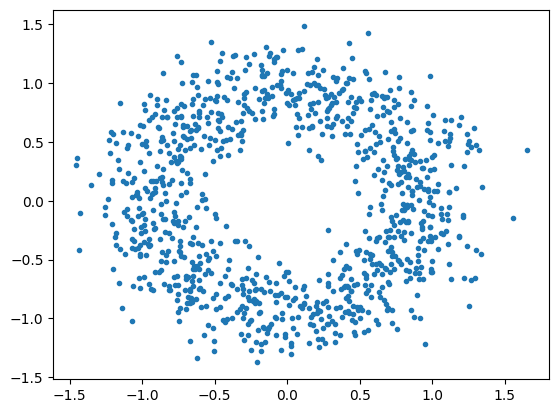

In [11]:
# Enter your solution here
plt.plot(X[:,0],X[:,1],'.')
plt.show()

## Problem 2
How many samples are there in the dataset?


In [16]:
# Enter your solution here
n = X.shape[0]
n

1000

## Problem 3
How many features are there in the dataset?

In [17]:
# Enter your solution here
d = X.shape[1]
d

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [18]:
# Enter your solution here
K=np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i,j]=(np.dot(X[i,:],X[j,:]) + 1) ** 2

sum=0
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        sum+=K[i,j]**2
np.sqrt(sum)/n

2.096195646589976

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [21]:
# Enter your solution here
K_=np.zeros((n, n))
sigma = 2
for i in range(n):
    for j in range(n):
        K_[i,j] = np.exp(-np.linalg.norm(X[i,:]-X[j,:])**2 / 2 / sigma ** 2)

sum=0
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        sum+=K_[i,j]**2
np.sqrt(sum)/n

0.8079400085319918

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [23]:
# Enter your solution here
I = np.ones((n, n)) / n
KC = K - I @ K - K @ I + I @ K @ I
sum=0
for i in range(n):
    for j in range(n):
        sum+=KC[i,j]**2
np.sqrt(sum)/n

1.451798517697666

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the projections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$1/n \sum_{i = 1}^{n} |\alpha_i| + 1/n \sum_{i = 1}^{n} |\beta_i|$$

In [47]:
# Enter your solution here
eigen_values, eigen_vectors = np.linalg.eigh(KC)

idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

alphas = eigen_vectors / np.sqrt(np.abs(eigen_values.reshape((1, -1))))

X_prime = KC @ alphas

sum=0
for i in range(n):
    sum+=np.abs(X_prime[i,0])
    sum+=np.abs(X_prime[i,1])
sum/n

1.7447267990953284